## Data Preparation

In [ ]:
#!pip install opencv-python
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [167]:
def crop_image(image, window_size=750):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Find centre of the image
    x0 = image.shape[0] // 2 
    y0 = image.shape[1] // 2

    # create 1500 x 1500 image around the centre of the image
    x1 = max(x0 - window_size, 0)
    y1 = max(y0 - window_size, 0)
    x2 = min(x0 + window_size, image.shape[0])
    y2 = min(y0 + window_size, image.shape[1])
    
    return image_rgb[x1:x2,y1:y2]

def crop_optic_disc(image, region_size=300):
    cropped_image = crop_image(image)

    # convert to grayscale and denoise image to find the brightest region
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    denoised_image = cv2.GaussianBlur(gray, (15,15), 0)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(denoised_image)

    # Define a 600 x 600 region around the brightest point (max_loc)
    x1 = max(max_loc[0] - region_size, 0)
    y1 = max(max_loc[1] - region_size, 0)
    x2 = min(max_loc[0] + region_size, cropped_image.shape[1])
    y2 = min(max_loc[1] + region_size, cropped_image.shape[0])

    # Return the region around the brightest point
    brightest_region = cropped_image[y1:y2, x1:x2]
    return brightest_region


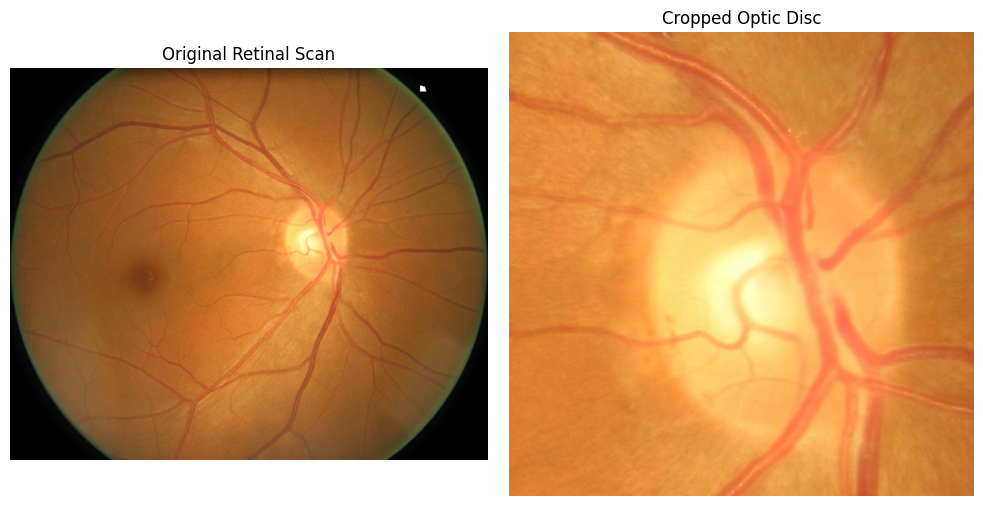

In [168]:
image = cv2.imread("./data/Images/009.jpg")
original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
optic_disc = crop_optic_disc(image)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(original_image)
plt.title("Original Retinal Scan")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(optic_disc)
plt.title("Cropped Optic Disc")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# CSV file with filenames and target (glaucoma or normal)
origa_data = pd.read_csv("./data/OrigaList.csv")
origa_data.head()

,Eye,Filename,ExpCDR,Set,Glaucoma
0,OD,001.jpg,0.7097,A,0
1,OS,002.jpg,0.6953,A,0
2,OS,003.jpg,0.9629,A,0
3,OD,004.jpg,0.7246,A,0
4,OS,005.jpg,0.6138,A,0


In [70]:
filename_list = origa_data["Filename"].to_list()
glaucoma_list = origa_data["Glaucoma"].to_list()

In [71]:
print(f"Number of images: {len(filename_list)}")
print(f"Number of cases w/ Glaucoma: {np.sum(glaucoma_list)}")

Number of images: 650
Number of cases w/ Glaucoma: 168


In [169]:
# crop optic disc from retinal scan and move it to the appropriate directory
def data_prep(file,target):
    
    input_file = f"./data/Images/{file}"
    print(input_file)
    image = cv2.imread(input_file)
    optic_disc = crop_optic_disc(image)
    
    if target == 0: # no glaucoma
        output_image = cv2.cvtColor(optic_disc, cv2.COLOR_BGR2RGB)
        output_file = f"./data/normal/{file}"
        
    elif target == 1: # glaucoma
        output_image = cv2.cvtColor(optic_disc, cv2.COLOR_BGR2RGB)
        output_file = f"./data/glaucoma/{file}"
    
    cv2.imwrite(output_file, output_image)

In [170]:
for file,target in zip(filename_list, glaucoma_list):
    data_prep(file,target)

./data/Images/001.jpg
./data/Images/002.jpg
./data/Images/003.jpg
./data/Images/004.jpg
./data/Images/005.jpg
./data/Images/006.jpg
./data/Images/007.jpg
./data/Images/008.jpg
./data/Images/009.jpg
./data/Images/010.jpg
./data/Images/011.jpg
./data/Images/012.jpg
./data/Images/013.jpg
./data/Images/014.jpg
./data/Images/015.jpg
./data/Images/016.jpg
./data/Images/017.jpg
./data/Images/018.jpg
./data/Images/019.jpg
./data/Images/020.jpg
./data/Images/021.jpg
./data/Images/022.jpg
./data/Images/023.jpg
./data/Images/024.jpg
./data/Images/025.jpg
./data/Images/026.jpg
./data/Images/027.jpg
./data/Images/028.jpg
./data/Images/029.jpg
./data/Images/030.jpg
./data/Images/031.jpg
./data/Images/032.jpg
./data/Images/033.jpg
./data/Images/034.jpg
./data/Images/035.jpg
./data/Images/036.jpg
./data/Images/037.jpg
./data/Images/038.jpg
./data/Images/039.jpg
./data/Images/040.jpg
./data/Images/041.jpg
./data/Images/042.jpg
./data/Images/043.jpg
./data/Images/044.jpg
./data/Images/045.jpg
./data/Ima